In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('diabetes.csv')
df.head()
df.dropna

<bound method DataFrame.dropna of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   3

In [22]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize KNN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)
# Predict on test data
y_pred = knn.predict(X_test_scaled)

In [36]:
# Compute evaluation metrics
cm = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

In [37]:
# Display results
print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
 [[79 20]
 [27 28]]

Accuracy: 0.6948
Error Rate: 0.3052
Precision: 0.5833
Recall: 0.5091


In [38]:
import seaborn as sns

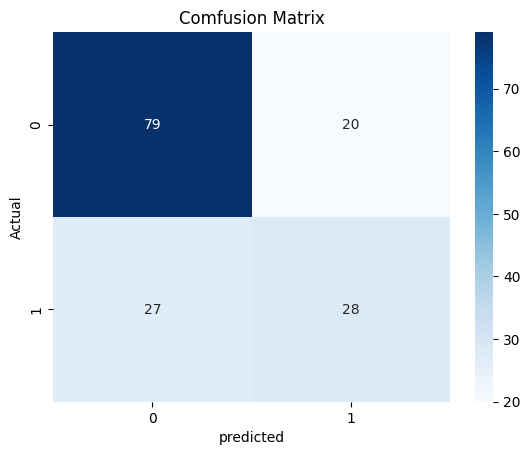

In [39]:
sns.heatmap(cm,annot=True,cmap="Blues",cbar=1)
plt.title("Comfusion Matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()